In [1]:
# Step 1: Load Raw Data
import pandas as pd

In [4]:
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
# Step 2: Encode Categorical Variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [6]:
# Step 3: One-Hot Encode Multi-Class Columns
df = pd.get_dummies(df, columns=[
    'EmpDepartment', 'BusinessTravelFrequency', 'EducationBackground',
    'EmpJobRole', 'MaritalStatus'
], drop_first=True)

In [7]:
# Step 4: Save Processed Data
import os
os.makedirs("../../data/processed", exist_ok=True)
df.to_csv("../../data/processed/processed_data.csv", index=False)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


In [9]:
# Create a copy to work with
data = df.copy()

# Drop ID column
data = data.drop(columns=['EmpNumber'])

In [10]:
# Encode categorical text columns
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

In [11]:
# One-hot encode remaining text columns
data = pd.get_dummies(data, drop_first=True)

In [12]:
# Separate features (X) and target (y)
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [14]:
import numpy as np

In [15]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

In [16]:
# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

In [17]:
# Sort and display top 3
top_3 = importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3)


                       Feature  Importance
11    EmpLastSalaryHikePercent    0.188161
4   EmpEnvironmentSatisfaction    0.180142
18     YearsSinceLastPromotion    0.082783


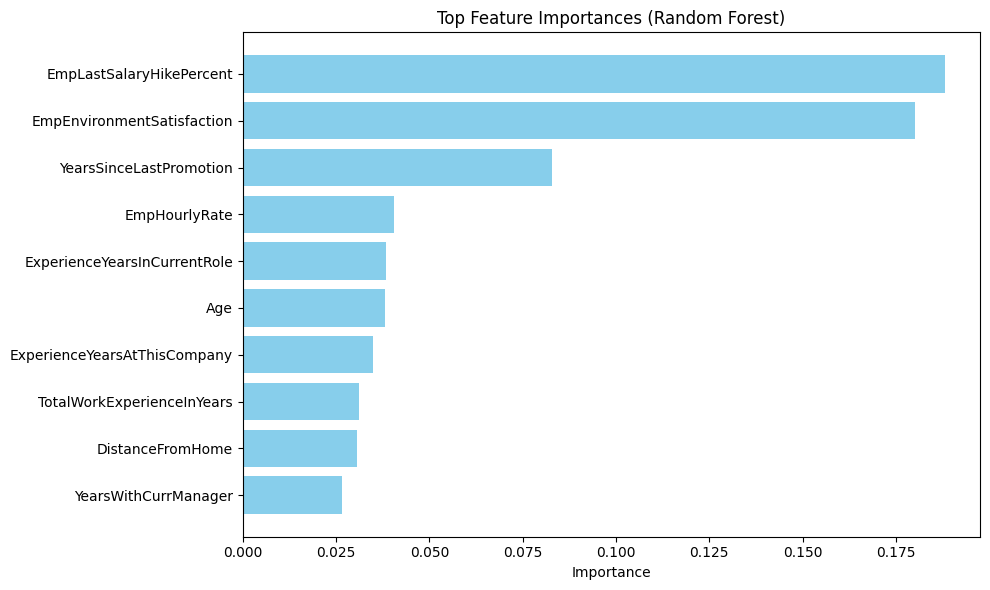

In [18]:
import matplotlib.pyplot as plt
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()